In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
AVA_DATASET_BASE_PATH = "/mnt/z/Descargas/AVA_Dataset"
IMAGES_PATH = AVA_DATASET_BASE_PATH + "/images/images/{image_id}.jpg"

In [3]:
images_data = pd.read_csv(AVA_DATASET_BASE_PATH + "/AVA.txt", sep=' ', header=None,
                          names=(['index', 'image_id'] + [str(i) for i in range(1, 11)] + ["tag1", "tag2", "challenge_id"])).drop(columns="index")

In [4]:
images_data

,image_id,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id
0,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396
1,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396
2,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396
3,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396
4,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255525,56938,1,7,17,40,84,56,31,13,6,1,9,0,181
255526,57304,1,0,8,25,50,65,55,26,18,7,1,18,181
255527,56711,0,0,8,11,26,47,48,56,30,22,9,24,181
255528,57303,0,2,19,30,75,60,30,25,5,2,22,0,181


In [5]:
images_data['total_votes'] = images_data[[str(i) for i in range(1, 11)]].sum(axis=1)
images_data['score'] = sum(images_data[str(i)]*i/10 for i in range(1, 11))/images_data['total_votes']
images_data

,image_id,1,2,3,4,5,6,7,8,9,10,tag1,tag2,challenge_id,total_votes,score
0,953619,0,1,5,17,38,36,15,6,5,1,1,22,1396,124,0.563710
1,953958,10,7,15,26,26,21,10,8,1,2,1,21,1396,126,0.469841
2,954184,0,0,4,8,41,56,10,3,4,0,0,0,1396,126,0.567460
3,954113,0,1,4,6,48,37,23,5,2,2,15,21,1396,128,0.577344
4,953980,0,3,6,15,57,39,6,1,1,1,22,38,1396,129,0.520930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255525,56938,1,7,17,40,84,56,31,13,6,1,9,0,181,256,0.533984
255526,57304,1,0,8,25,50,65,55,26,18,7,1,18,181,255,0.623529
255527,56711,0,0,8,11,26,47,48,56,30,22,9,24,181,248,0.707258
255528,57303,0,2,19,30,75,60,30,25,5,2,22,0,181,248,0.560887


In [6]:
images_data['total_votes'].min()

78

In [7]:
images_data = images_data[['image_id', 'score']]
images_data

,image_id,score
0,953619,0.563710
1,953958,0.469841
2,954184,0.567460
3,954113,0.577344
4,953980,0.520930
...,...,...
255525,56938,0.533984
255526,57304,0.623529
255527,56711,0.707258
255528,57303,0.560887


In [8]:
ids_to_use = []
with open(AVA_DATASET_BASE_PATH + "/aesthetics_image_lists/generic_ls_train.jpgl", "r") as file:
    for l in file:
        ids_to_use.append(l)
with open(AVA_DATASET_BASE_PATH + "/aesthetics_image_lists/generic_test.jpgl", "r") as file:
    for l in file:
        ids_to_use.append(int(l.rstrip()))
ids_to_use = set(ids_to_use)

In [9]:
images_data = images_data[images_data['image_id'].isin(ids_to_use)]
images_data

,image_id,score
4,953980,0.520930
48,954013,0.675000
83,953630,0.528226
141,771289,0.557895
151,771082,0.524848
...,...,...
255490,56554,0.443902
255491,57078,0.581405
255500,56459,0.534440
255503,57306,0.589370


(array([  10.,   55.,  375., 1805., 5602., 5250., 4995., 1582.,  239.,
          17.]),
 array([0.20668896, 0.26902007, 0.33135117, 0.39368227, 0.45601338,
        0.51834448, 0.58067559, 0.64300669, 0.70533779, 0.7676689 ,
        0.83      ]),
 <BarContainer object of 10 artists>)

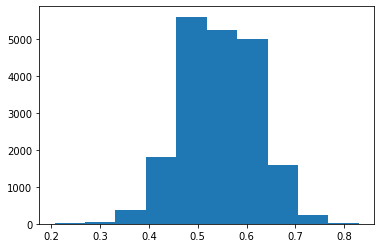

In [10]:
plt.hist(images_data['score'])

In [11]:
images_data['score'].mean()

0.5448402117532216

In [12]:
(abs(images_data['score']-images_data['score'].mean())/images_data['score']).mean()

0.11938479456958635

In [13]:
images_data = images_data.sample(len(images_data))
images_data['path'] = images_data['image_id'].map(lambda x: IMAGES_PATH.format(image_id=x))
images_data['score'] = (images_data['score']>images_data['score'].quantile(0.5)).astype('int')

In [14]:
(images_data['score']==1).mean()

0.5

In [15]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h5py
import cv2
from tensorflow.keras.layers import Flatten, Dense, Input,concatenate, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

In [16]:
mobilenet = keras.applications.mobilenet.MobileNet()

In [17]:
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
outencoder = mobilenet.layers[-6].output

In [19]:
encoder = Model(inputs=mobilenet.input, outputs=outencoder)
encoder.trainable = False

In [20]:
input_regressor = encoder(mobilenet.input)

dense1 = Dense(256, activation='tanh')(input_regressor)
regressor = Dense(1, activation='sigmoid')(dense1)

final_model = Model(inputs=mobilenet.input, outputs=regressor)

In [21]:
final_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
model (Functional)           (None, 1024)              3228864   
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 3,491,521
Trainable params: 262,657
Non-trainable params: 3,228,864
_________________________________________________________________


In [22]:
BATCH_SIZE = 32

In [23]:
train_generator = ImageDataGenerator(rotation_range=15, 
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1,
                                     horizontal_flip=False, 
                                     vertical_flip=False,
                                     zoom_range=0.1,
                                     validation_split=0.15,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

traingen = train_generator.flow_from_dataframe(images_data,
                                               x_col='path',
                                               y_col='score',
                                               target_size=(224, 224),
                                               class_mode='raw',
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=42)

validgen = train_generator.flow_from_dataframe(images_data,
                                               x_col='path',
                                               y_col='score',
                                               target_size=(224, 224),
                                               class_mode='raw',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=42)

/home/jian01/.pyenv/versions/3.9.5/envs/general/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Found 16940 validated image filenames.
Found 2989 validated image filenames.


In [24]:
final_model.compile(optimizer=Adam(0.0005), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])
early_stop = EarlyStopping(monitor='val_accuracy',
                           patience=6,
                           restore_best_weights=True,
                           mode='max')

In [25]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

hist = final_model.fit(traingen,
                     batch_size=BATCH_SIZE,
                     epochs=40,
                     validation_data=validgen,
                     steps_per_epoch=traingen.samples // BATCH_SIZE,
                     validation_steps=validgen.samples // BATCH_SIZE,
                     callbacks=[early_stop])

Epoch 1/40
151/529 [=======>......................] - ETA: 3:40 - loss: 0.7291 - accuracy: 0.5404 - auc: 0.5608

/home/jian01/.pyenv/versions/3.9.5/envs/general/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:866: UserWarning: Truncated File Read
  warnings.warn(str(msg))


529/529 [==============================] - 370s 691ms/step - loss: 0.6909 - accuracy: 0.5694 - auc: 0.5950 - val_loss: 0.6674 - val_accuracy: 0.5864 - val_auc: 0.6287
Epoch 2/40
529/529 [==============================] - 362s 685ms/step - loss: 0.6583 - accuracy: 0.6057 - auc: 0.6496 - val_loss: 0.6628 - val_accuracy: 0.6072 - val_auc: 0.6509
Epoch 3/40
529/529 [==============================] - 360s 681ms/step - loss: 0.6431 - accuracy: 0.6289 - auc: 0.6771 - val_loss: 0.6618 - val_accuracy: 0.6085 - val_auc: 0.6515
Epoch 4/40
529/529 [==============================] - 358s 676ms/step - loss: 0.6328 - accuracy: 0.6434 - auc: 0.6936 - val_loss: 0.6602 - val_accuracy: 0.6065 - val_auc: 0.6525
Epoch 5/40
529/529 [==============================] - 363s 686ms/step - loss: 0.6250 - accuracy: 0.6460 - auc: 0.7051 - val_loss: 0.6622 - val_accuracy: 0.6025 - val_auc: 0.6633
Epoch 6/40
529/529 [==============================] - 406s 767ms/step - loss: 0.6122 - accuracy: 0.6615 - auc: 0.7226 - v

In [26]:
import os
import pickle
import tarfile
from abc import abstractmethod, ABC
from io import BytesIO
from tempfile import NamedTemporaryFile, TemporaryDirectory
from typing import Iterator, NamedTuple, Optional, overload, cast, List, Tuple, Union

def get_bytes_from_model(model: Model) -> bytes:
    model_path = TemporaryDirectory()

    model.save(model_path.name)
    with NamedTemporaryFile() as tar_temp_file:
        with tarfile.open(tar_temp_file.name, mode="w:gz") as archive:
            archive.add(model_path.name, arcname="model")

        model_path.cleanup()
        with open(tar_temp_file.name, "rb") as model_tarfile:
            model_bytes = model_tarfile.read()
    model_path.cleanup()
    return model_bytes

In [27]:
model_bytes = get_bytes_from_model(final_model)

INFO:tensorflow:Assets written to: /tmp/tmp27j4zv_1/assets


In [28]:
with open('../web-api/beauty_model.model', 'wb') as file:
    file.write(model_bytes)